In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('creditcardfraud_normalised.csv')

In [3]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [4]:
X = df.drop('class', axis=1)
y = df['class']

In [6]:
import numpy as np
# Example feature matrix
X = np.array(X)

X[0:5]

array([[9.35192e-01, 7.66490e-01, 8.81365e-01, 3.13023e-01, 7.63439e-01,
        2.67669e-01, 2.66815e-01, 7.86444e-01, 4.75312e-01, 5.10600e-01,
        2.52484e-01, 6.80908e-01, 3.71591e-01, 6.35591e-01, 4.46084e-01,
        4.34392e-01, 7.37173e-01, 6.55066e-01, 5.94863e-01, 5.82942e-01,
        5.61184e-01, 5.22992e-01, 6.63793e-01, 3.91253e-01, 5.85122e-01,
        3.94557e-01, 4.18976e-01, 3.12697e-01, 5.82400e-03],
       [9.78542e-01, 7.70067e-01, 8.40298e-01, 2.71796e-01, 7.66120e-01,
        2.62192e-01, 2.64875e-01, 7.86298e-01, 4.53981e-01, 5.05267e-01,
        3.81188e-01, 7.44342e-01, 4.86190e-01, 6.41219e-01, 3.83840e-01,
        4.64105e-01, 7.27794e-01, 6.40681e-01, 5.51930e-01, 5.79530e-01,
        5.57840e-01, 4.80237e-01, 6.66938e-01, 3.36440e-01, 5.87290e-01,
        4.46013e-01, 4.16345e-01, 3.13423e-01, 1.05000e-04],
       [9.35217e-01, 7.53118e-01, 8.68141e-01, 2.68766e-01, 7.62329e-01,
        2.81122e-01, 2.70177e-01, 7.88042e-01, 4.10603e-01, 5.13018e-01,
  

In [7]:
import numpy as np

def select_linearly_independent_features(X):
    # Perform QR decomposition
    Q, R = np.linalg.qr(X)

    # Determine rank of R
    rank = np.linalg.matrix_rank(R)

    # Select columns of Q corresponding to linearly independent features
    selected_features = Q[:, :rank]#The rank of a matrix is the maximum number of linearly independent column vectors in the matrix.

    return selected_features#RANK IS THE NUMBER OF NON ZERO ROWS


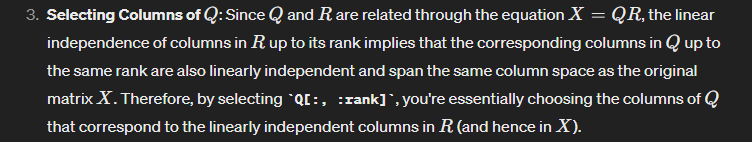

In [8]:
# Select linearly independent features
selected_features = select_linearly_independent_features(X)

In [9]:
print("Selected features (orthogonal basis):")
print(selected_features[0:5])

Selected features (orthogonal basis):
[[-1.82753253e-03  1.09705151e-03 -3.10414252e-03  1.75980480e-03
  -1.10945483e-03  5.90792626e-04  2.24884101e-04 -9.25473299e-05
   5.70792948e-04  5.86257645e-05  1.03244116e-03 -1.22189179e-03
   1.88039973e-03 -6.42186168e-04 -2.99704176e-03  1.03322748e-03
   4.12621238e-04 -3.60813072e-05  9.11051443e-04  3.95769292e-04
  -2.10922438e-04 -6.65298033e-04 -5.42535067e-04 -1.96261723e-04
  -4.13620801e-04  7.48447776e-04  4.60698120e-04  2.62148420e-04
  -9.13429794e-05]
 [-1.91224619e-03 -7.33705806e-04  2.59765791e-04  5.38055038e-04
  -6.42125479e-04 -2.22834618e-04 -2.88469979e-04 -1.17722170e-04
  -4.80560467e-04 -3.60539014e-04 -2.94460462e-03  1.90624536e-03
  -8.85355972e-04 -4.01511056e-04 -1.27182418e-03 -8.86517971e-04
  -4.48188897e-04  4.78735086e-04 -3.87296210e-04 -5.10149938e-04
  -7.33669007e-04  1.68160826e-03  1.68033259e-04  1.06089150e-03
  -5.59193363e-04 -4.76630000e-04 -1.66092674e-04  1.35355888e-05
  -3.89464516e-04]


In [16]:
Q, R = np.linalg.qr(X)

In [18]:
rank = np.linalg.matrix_rank(R)
rank

29

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Create a list of classifiers to evaluate
classifiers = [LogisticRegression(), DecisionTreeClassifier()]

# Create parameter grids for each classifier
lr_params = {'penalty': ['l1', 'none'], 'C': [0.1, 1, 10]}
dt_params = {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7]}
rf_params = {'n_estimators': [100, 300, 500], 'max_depth': [3, 5, 7]}
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
param_grids = [lr_params, dt_params, rf_params, knn_params]

# Loop over classifiers and parameter grids to find the best model
for i, classifier in enumerate(classifiers):
    clf = GridSearchCV(classifier, param_grids[i], cv=5)
    # Note: Ensure X_train, y_train, X_test, y_test are defined and contain your data
    clf.fit(X_train, y_train)  # Fit the model to the training data
    print(f"{classifier.__class__.__name__} best parameters: {clf.best_params_}")  # Print the best found parameters
    y_pred = clf.predict(X_test)  # Predict on the test set
    print(classification_report(y_test, y_pred))  # Print the classification report

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimi

LogisticRegression best parameters: {'C': 0.1, 'penalty': 'none'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.87      0.62      0.73       136

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

DecisionTreeClassifier best parameters: {'criterion': 'entropy', 'max_depth': 5}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.85      0.77      0.81       136

    accuracy                           1.00     85443
   macro avg       0.93      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [13]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [14]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
# make predictions on the test set
y_pred = rf_model.predict(X_test)

# evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)


# print the classification metrics
print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {rec}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC: {auc_roc}")

Accuracy: 0.9995903701883126
Precision: 0.9469026548672567
Recall: 0.7867647058823529
F1 Score: 0.859437751004016
AUC-ROC: 0.8933471858388284
